<font size=7> Laboratorio Final - Johan Andres Mendez Macea

# Imports

In [22]:
!pip3 install sodapy
!pip3 install geopy
!pip3 install OSMnx 
!pip3 install networkx
!pip3 install dash 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from sodapy import Socrata
from geopy.geocoders import Nominatim
from sklearn.preprocessing import LabelEncoder 
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Crypto

In [129]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [199]:
if(os.path.exists('coinmarketcap28Nov2021.csv')):
    df_data=pd.read_csv('coinmarketcap28Nov2021.csv')
    
else:
    print('Este proyecto vino con el .csv de los datos para las cryptos, buscarlo y ponerlo en la misma carpeta si no esta, pero deberia estar')


In [226]:
df_data

,name,symbol,market_cap,market_cap_dominance,percent_change_24h,percent_change_7d,price,volume_24h,volume_change_24h
0,Bitcoin,BTC,1.061289e+12,42.1423,2.390785,-4.992420,56195.212553,2.694467e+10,-12.4594
1,Ethereum,ETH,5.015886e+11,19.9174,2.834156,-1.951007,4231.784768,1.534469e+10,-8.4397
2,Binance Coin,BNB,1.008346e+11,4.0040,-0.246915,2.701399,604.519661,2.674766e+09,6.3495
3,Tether,USDT,7.314833e+10,2.9046,0.029193,0.034340,1.000370,7.089837e+10,-4.9364
4,Solana,SOL,5.987047e+10,2.3774,1.183665,-14.673800,196.911485,1.926555e+09,31.7377
5,Cardano,ADA,5.182061e+10,2.0573,0.118736,-16.301355,1.555556,2.118593e+09,33.5278
6,XRP,XRP,4.484610e+10,1.7779,0.120075,-11.089437,0.950956,2.509131e+09,1.9504
7,USD Coin,USDC,3.839214e+10,1.5232,-0.002351,0.104501,0.999984,4.238772e+09,9.8518
8,Polkadot,DOT,3.445672e+10,1.3682,-1.411144,-18.554819,34.890083,1.457187e+09,38.7357
9,Dogecoin,DOGE,2.689910e+10,1.0681,-1.075985,-10.735849,0.203313,9.875166e+08,5.5597


## 20 criptos con mayor capitalizacion del mercado

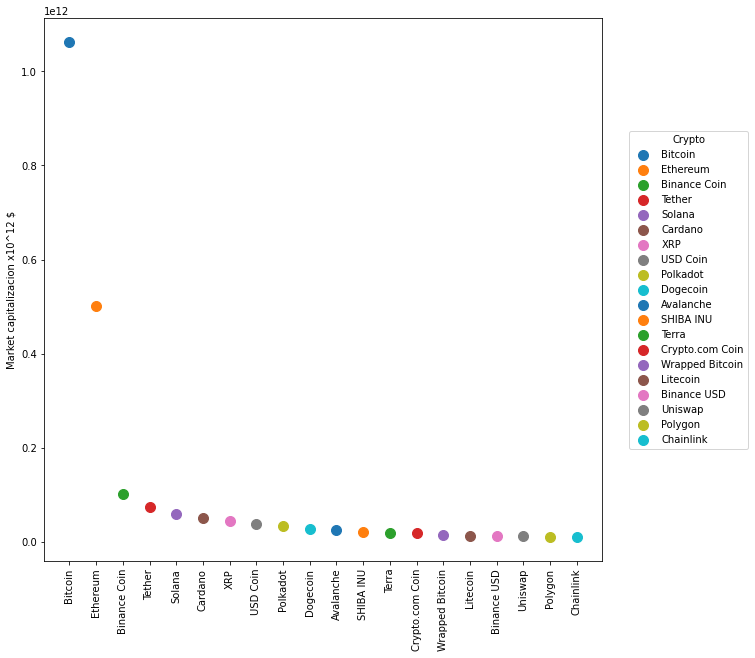

In [224]:
# punto 1 - 20 criptos con mayor capitalizacion del mercado

auxiliar=df_data[['name','market_cap']]
fig,ax=plt.subplots(1,1,figsize=(10,10))
for x in range(len(auxiliar.values[:,0])):
    ax.scatter(auxiliar.values[x,0],auxiliar.values[x,1],label=auxiliar.values[x,0],s=100)
ax.legend(title='Crypto',bbox_to_anchor=(1.04,0.5),loc='center left')
ax.set_ylabel('Market capitalizacion x10^12 $')
plt.xticks(rotation=90)
plt.show()

## Volatilidad de las Top 5 Cryptos con mayor capitalizacion

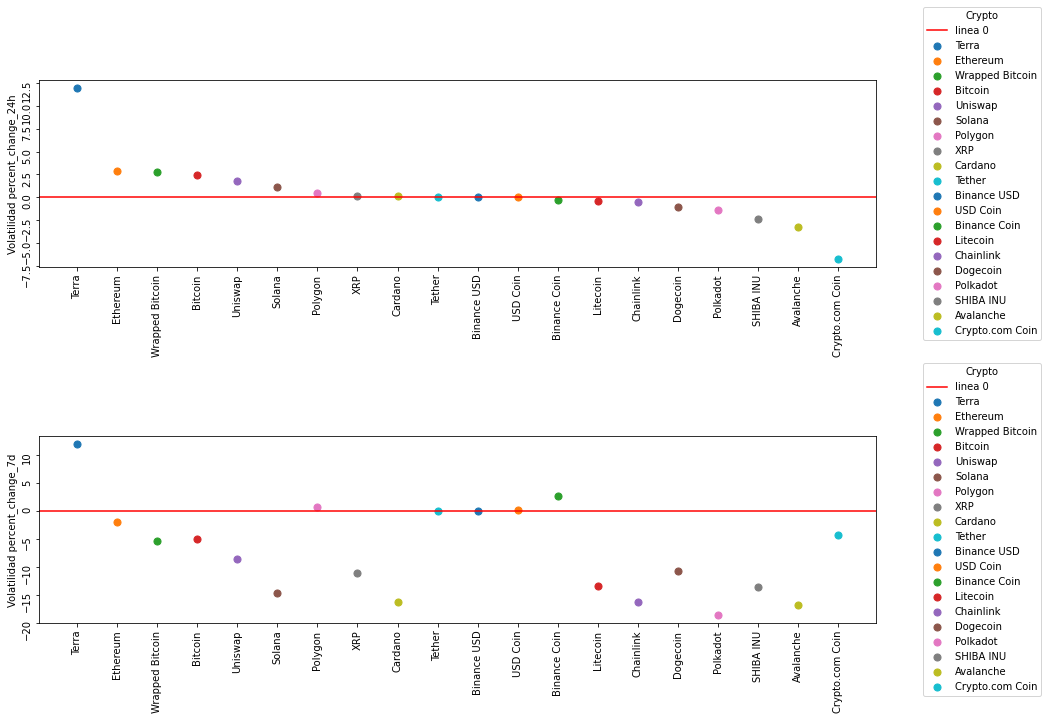

In [259]:
aux3=df_data[['name','percent_change_24h','percent_change_7d']]
aux31=aux3.sort_values(['percent_change_24h','percent_change_7d'],ascending=[False,False])
fig,ax=plt.subplots(2,1,figsize=(15,10))
for y in range(2):
    ax[y].axhline(y=0,color='r',linestyle='-',label='linea 0')
    for x in range(len(aux31.values[:,0])):
        ax[y].scatter(aux31.values[x,0],aux31.values[x,y+1],label=aux31.values[x,0],s=50)
    ax[y].legend(title='Crypto',bbox_to_anchor=(1.05,0.5),loc='center left')
    ax[y].set_ylabel(F"Volatilidad {aux31.columns.values[y+1]}")
    ax[y].tick_params(rotation=90)
# plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.9)
plt.show()

<font size=5>La cripto mas conveniente para comprar en el momento es Terra pues esta ha mantenido el alza las 24h y tambien las ultimas 24 horas, por lo tanto es viable comprar ahora que es muy probable que siga subiendo.

Datos tomados de [https://coinmarketcap.com/es](https://coinmarketcap.com/es) /</font>
<hr>

# 2. England Soccer League Teams Analysis

## Data Recollection and transformation

<font size=5> Fuente de datos:  [https://www.football-data.co.uk/englandm.php](https://www.football-data.co.uk/englandm.php)> 

In [3]:
df_2021=pd.read_csv('https://www.football-data.co.uk/mmz4281/2122/E0.csv',usecols=[
    'HomeTeam' # Equipo local
    ,'AwayTeam' # Equipo visitante
    ,'FTHG'  # Goles anotados totales equipo local por partido
    ,'FTAG'  # Goles anotados totales equipo visitante por partido 
    ,'HST'    # Disparos a arco, equipo local
    ,'AST' # Dispato a arco, equipo visitante
    ,'HC'  # Tiros de esquina local
    ,'AC'  # Tiros esquinas Visitante
    ,'HF'  # Faltas cometidas local
    ,'AF' # Faltas cometidas visitante 
    ])
df_202101=df_2021[['HomeTeam','FTHG','FTAG','HST','AST','HC','AC','HF','AF']]
df_202101.columns=['Team','GolesH','GolesR','Disp.HA','Disp.RA','TiroEsqH','TiroEsqP','FaltasR','FaltasC']
df_202102=df_2021[['AwayTeam','FTAG','FTHG','AST','HST','AC','HC','AF','HF']]
df_202102.columns=['Team','GolesH','GolesR','Disp.HA','Disp.RA','TiroEsqH','TiroEsqP','FaltasR','FaltasC']
Total=df_202101.append(df_202102,ignore_index=True,sort=False)

df_2020=pd.read_csv('https://www.football-data.co.uk/mmz4281/2021/E0.csv',usecols=[
    'HomeTeam' # Equipo local
    ,'AwayTeam' # Equipo visitante
    ,'FTHG'  # Goles anotados totales equipo local por partido
    ,'FTAG'  # Goles anotados totales equipo visitante por partido 
    ,'HST'    # Disparos a arco, equipo local
    ,'AST' # Dispato a arco, equipo visitante
    ,'HC'  # Tiros de esquina local
    ,'AC'  # Tiros esquinas Visitante
    ,'HF'  # Faltas cometidas local
    ,'AF' # Faltas cometidas visitante 
    ])
df_202001=df_2020[['HomeTeam','FTHG','FTAG','HST','AST','HC','AC','HF','AF']]
df_202001.columns=['Team','GolesH','GolesR','Disp.HA','Disp.RA','TiroEsqH','TiroEsqP','FaltasR','FaltasC']
df_202002=df_2020[['AwayTeam','FTAG','FTHG','AST','HST','AC','HC','AF','HF']]
df_202002.columns=['Team','GolesH','GolesR','Disp.HA','Disp.RA','TiroEsqH','TiroEsqP','FaltasR','FaltasC']
Total=Total.append([df_202001,df_202002],ignore_index=True,sort=False)

df_2019=pd.read_csv('https://www.football-data.co.uk/mmz4281/1920/E0.csv',usecols=[
    'HomeTeam' # Equipo local
    ,'AwayTeam' # Equipo visitante
    ,'FTHG'  # Goles anotados totales equipo local por partido
    ,'FTAG'  # Goles anotados totales equipo visitante por partido 
    ,'HST'    # Disparos a arco, equipo local
    ,'AST' # Dispato a arco, equipo visitante
    ,'HC'  # Tiros de esquina local
    ,'AC'  # Tiros esquinas Visitante
    ,'HF'  # Faltas cometidas local
    ,'AF' # Faltas cometidas visitante 
    ])
df_201901=df_2019[['HomeTeam','FTHG','FTAG','HST','AST','HC','AC','HF','AF']]
df_201901.columns=['Team','GolesH','GolesR','Disp.HA','Disp.RA','TiroEsqH','TiroEsqP','FaltasR','FaltasC']
df_201902=df_2019[['AwayTeam','FTAG','FTHG','AST','HST','AC','HC','AF','HF']]
df_201902.columns=['Team','GolesH','GolesR','Disp.HA','Disp.RA','TiroEsqH','TiroEsqP','FaltasR','FaltasC']
Total=Total.append([df_201901,df_201902],ignore_index=True,sort=False)
# Total=df_202101.append(df_202102,ignore_index=True,sort=False)
Total

,Team,GolesH,GolesR,Disp.HA,Disp.RA,TiroEsqH,TiroEsqP,FaltasR,FaltasC
0,Brentford,2,0,3,4,2,5,12,8
1,Man United,5,1,8,3,5,4,11,9
2,Burnley,1,2,3,8,7,6,10,7
3,Chelsea,3,0,6,1,5,2,15,11
4,Everton,3,1,6,3,6,8,13,15
...,...,...,...,...,...,...,...,...,...
1755,Man United,2,0,3,3,3,3,11,12
1756,Norwich,0,5,4,10,0,9,4,7
1757,Liverpool,3,1,6,2,4,2,5,11
1758,Sheffield United,1,3,3,4,1,9,16,9


<font size=5.5>Se han extraido los datos de los respectivos equipos reorganizandose sin importar la distinción de equipo local o de visitante, con esto queda el conjunto de datos preparado para hacer el análisis </font>

***

Indices:

0. GolesH = Goles hechos por partido
1. GolesR = Goles recibidos por partido
2. Disp.HA = Disparos hechos a Arco por partido
3. Disp.RA = Disparos Recibidos a Arco
4. TiroEsqH = Tiros Esquina Hechos
5. FaltasR = Faltas recibidas
6. FaltasC = Faltas Cometidas

## Tabla Análisis Equipo

In [4]:
HistoriaGlobal=Total[['Team','GolesH','GolesR','Disp.HA']].groupby(['Team']).mean().sort_values(['GolesH'],ascending=False)
HistoriaGlobal[['Disp.RA','TiroEsqH','TiroEsqP','FaltasR','FaltasC']]=Total[['Team','GolesH','Disp.RA','TiroEsqH','TiroEsqP','FaltasR','FaltasC']].groupby('Team').sum().sort_values('GolesH',ascending=False).drop('GolesH',axis=1)
HistoriaGlobal


,GolesH,GolesR,Disp.HA,Disp.RA,TiroEsqH,TiroEsqP,FaltasR,FaltasC
Team,,,,,,,,
Man City,2.386364,0.829545,6.261364,237,644,243,831,806
Liverpool,2.136364,0.977273,6.034091,293,609,319,849,779
Man United,1.806818,1.147727,5.545455,323,468,411,1006,962
Chelsea,1.784091,1.068182,5.681818,265,547,357,939,913
Leicester,1.715909,1.272727,4.875000,338,496,429,932,1029
Tottenham,1.590909,1.238636,4.318182,395,430,476,979,1084
West Ham,1.522727,1.397727,4.431818,390,426,463,868,809
Leeds,1.480000,1.480000,5.040000,263,291,277,567,568
Arsenal,1.409091,1.181818,4.068182,382,497,466,878,998


<font size=5>En este punto los datos han sido tratados para ver una visualización general de cada equipo con un resumen de información sintetizada en el promedio de goles hechos por partido, goles recibidos por partido y tiros al arco hechos por partido y para el resto de datos (Disparo recibidos a Arco, Tiros esquinas Hechos, Tiros esquinas Permitidos, Faltas Recibidas y Faltas) se les ha aplicadó una sumatoria </font>

***

## Evaluacion del modelo: Inercia

In [5]:
from sklearn.cluster import KMeans


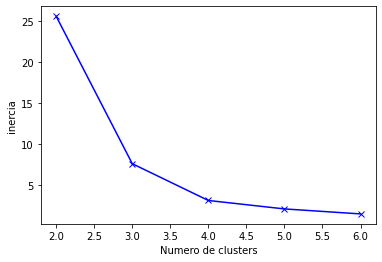

In [6]:
inercia=[]
gol_tiro=HistoriaGlobal[['GolesH','Disp.HA']].values

for x in range(1,6):
    kmeans=KMeans(n_clusters=x,init='k-means++',random_state=30)
    kmeans.fit(gol_tiro)
    inercia.append(kmeans.inertia_)

plt.plot([2,3,4,5,6],inercia,'bx-')
plt.xlabel('Numero de clusters')
plt.ylabel('inercia')
plt.show()

<font size=5>La evaluacion de la inercia muestra que la pendiente es mas pequeña de 4 a 5, con esto en mente se procede a coger el numero de clusters optimos en n=4, ademas se utiliza el procedimiento de clustering K-means debido que para la problematica no es posible despreciar puntos, se necesita hacer una evaluación total de equipos.</font>

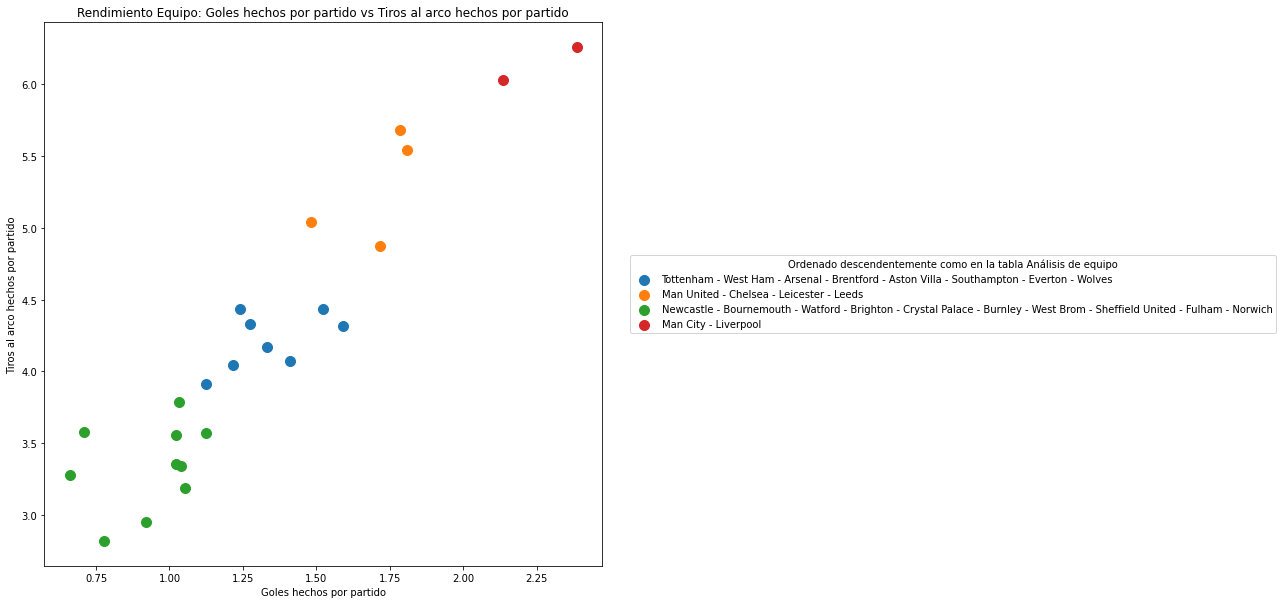

In [7]:
kmean=KMeans(n_clusters=4,init='k-means++',random_state=34)
# labels=LabelEncoder.fit(HistoriaGlobal.)
gol_tiro=HistoriaGlobal[['GolesH','Disp.HA']].values
X=kmean.fit_predict(gol_tiro)
# y_predict
kmean.labels_
fig,ax=plt.subplots(1,1,figsize=(10,10))
for x in np.unique(X):
    legenda=' - '.join(list(HistoriaGlobal.iloc[X==x,0].index))
    ax.scatter(gol_tiro[X==x,0],gol_tiro[X==x,1],s=100,label=legenda)
ax.set_xlabel('Goles hechos por partido')
ax.set_ylabel('Tiros al arco hechos por partido')
ax.set_title('Rendimiento Equipo: Goles hechos por partido vs Tiros al arco hechos por partido')
ax.legend(title='Ordenado descendentemente como en la tabla Análisis de equipo',bbox_to_anchor=(1.04,0.5),loc='center left')


<font size=5>Para este primer análisis de clustering vemos 4 categorias, cada una organizada por su color y leida descendentemente, estos colores hacen referencia a diferentes categorias de rendimiento, entre esos podemos ver. <hr> Verde - Bajo , Azul - Bajo/Medio , Naranja - Medio/Alto , Rojo - Alto <hr> Para nuestro problema debemos encontrar los mejores equipos por los cuales sería rentable invertir capital, en esta grafica donde se visualizan Goles hechos por partido y Tiros al arco hechos por partido apreciamos que la cima lo encabezan el "Man City" y "Liverpool" mientra que los equipos por los que no saldria rentable invertir estan en la categoria verde y estos son mas especificamente "Norwich" y "Fuham".<font>

***

## Analisís de  GolesR ,Disp.RA, TiroEsqH, TiroEsqP, FaltasR, FaltasC

Text(0.5, 1.0, 'Inercia de datos no deseados en un equipo')

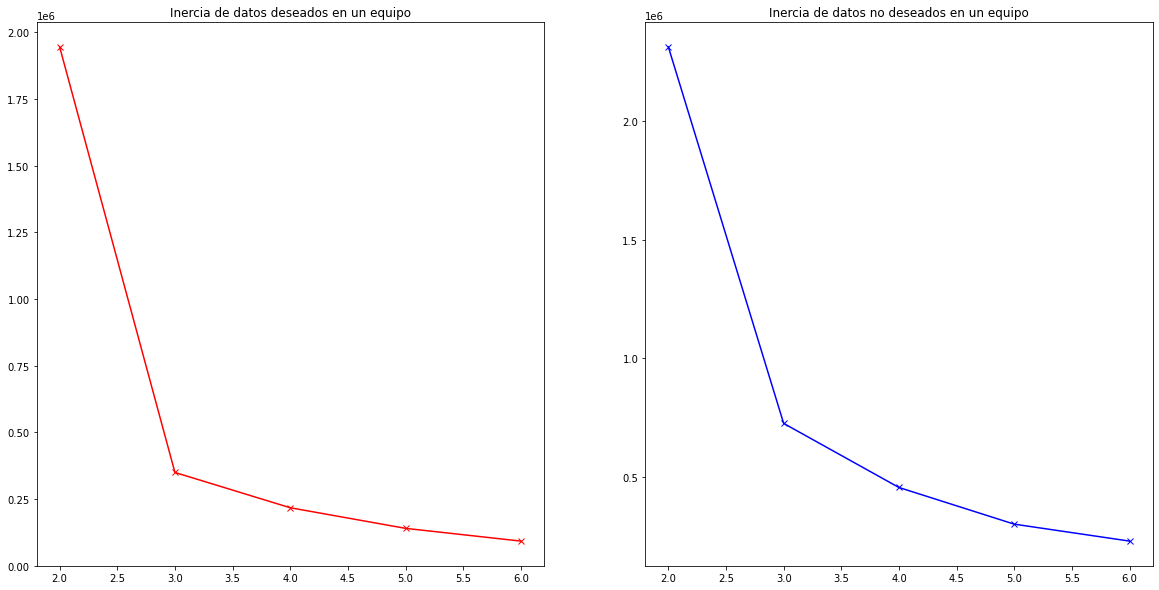

In [14]:
queremos=HistoriaGlobal[['TiroEsqH','FaltasR']]
noqueremos=HistoriaGlobal[['GolesR','Disp.RA','TiroEsqP','FaltasC']]

inercia1=[]
inercia2=[]
for x in range(1,6):
    kmeans1=KMeans(n_clusters=x,init='k-means++',random_state=30)
    kmeans1.fit(queremos.values)
    inercia1.append(kmeans1.inertia_)
    kmeans2=KMeans(n_clusters=x,init='k-means++',random_state=30)
    kmeans2.fit(noqueremos.values)
    inercia2.append(kmeans2.inertia_)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
ax1.plot([2,3,4,5,6],inercia1,'rx-')
ax2.plot([2,3,4,5,6],inercia2,'bx-')
ax1.set_title('Inercia de datos deseados en un equipo')
ax2.set_title('Inercia de datos no deseados en un equipo')

<font size=5>En esta seccion se hace análisis de dos clusters que representan las caracteristicas deseadas restantes y las caracteristicas no deseadas que se pueden encontrar en un equipo, para ambos grupos de datos se encuentra el menor delta de las inercias o el n optimo se encuentra en 4 clusters.</font>

***

## Análisis caracteristicas favorables

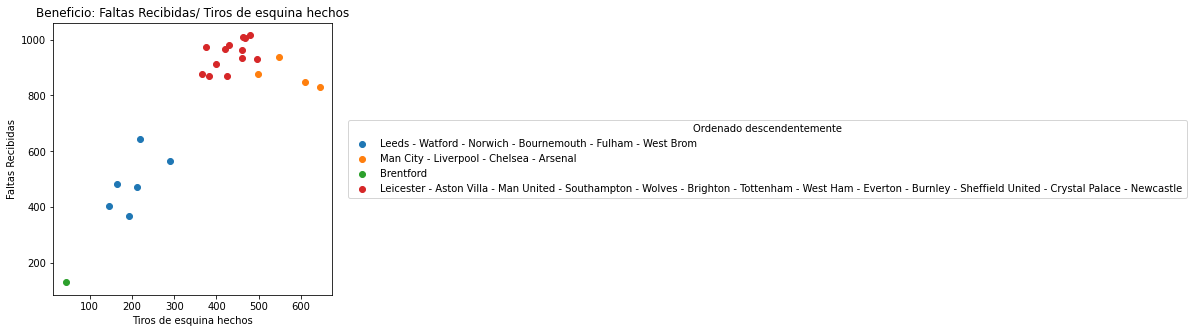

In [128]:
queremos=queremos.sort_values('TiroEsqH',ascending=False)
queremosvalores=queremos.values
noqueremos=noqueremos.sort_values('GolesR',ascending=False)
noqueremosvalores=noqueremos.values
kmeans1=KMeans(n_clusters=4,init='k-means++',random_state=30)
kmeans2=KMeans(n_clusters=4,init='k-means++',random_state=30)

X1=kmeans1.fit_predict(queremos)
X2=kmeans2.fit_predict(noqueremos)
fig,ax=plt.subplots(1,1,figsize=(5,5))
for y in np.unique(X1):
    
    etiqueta=' - '.join(queremos.iloc[X1==y,0].index)
    ax.scatter(queremosvalores[X1==y,0],queremosvalores[X1==y,1],label=etiqueta)
ax.set_xlabel( 'Tiros de esquina hechos')
ax.set_ylabel('Faltas Recibidas')
ax.set_title('Beneficio: Faltas Recibidas/ Tiros de esquina hechos')
ax.legend(title='Ordenado descendentemente',bbox_to_anchor=(1.04,0.5),loc='center left')
    
# for x in range(1,4):
# np.unique(X1)
# noqueremos
# plt.show()

<font size=5>Para Tiros de esquina hechos tenemos en la cima del eje x al "Man City" con de igual forma una cantidad de faltas recibidas considerables factores que dejan a estos equipos siendo buenas opciones par a la inversion, por otra parte tenemos al equipo con mayor faltas recibidas "Leicester" e igualmente grandes cantidades de tiros de esquina realizados, el equipo con mejor relacion Faltas recibidas y tiros de esquina hechos es el "Chelsea"</font>

***

## Analisis caracteristicas desfavorable

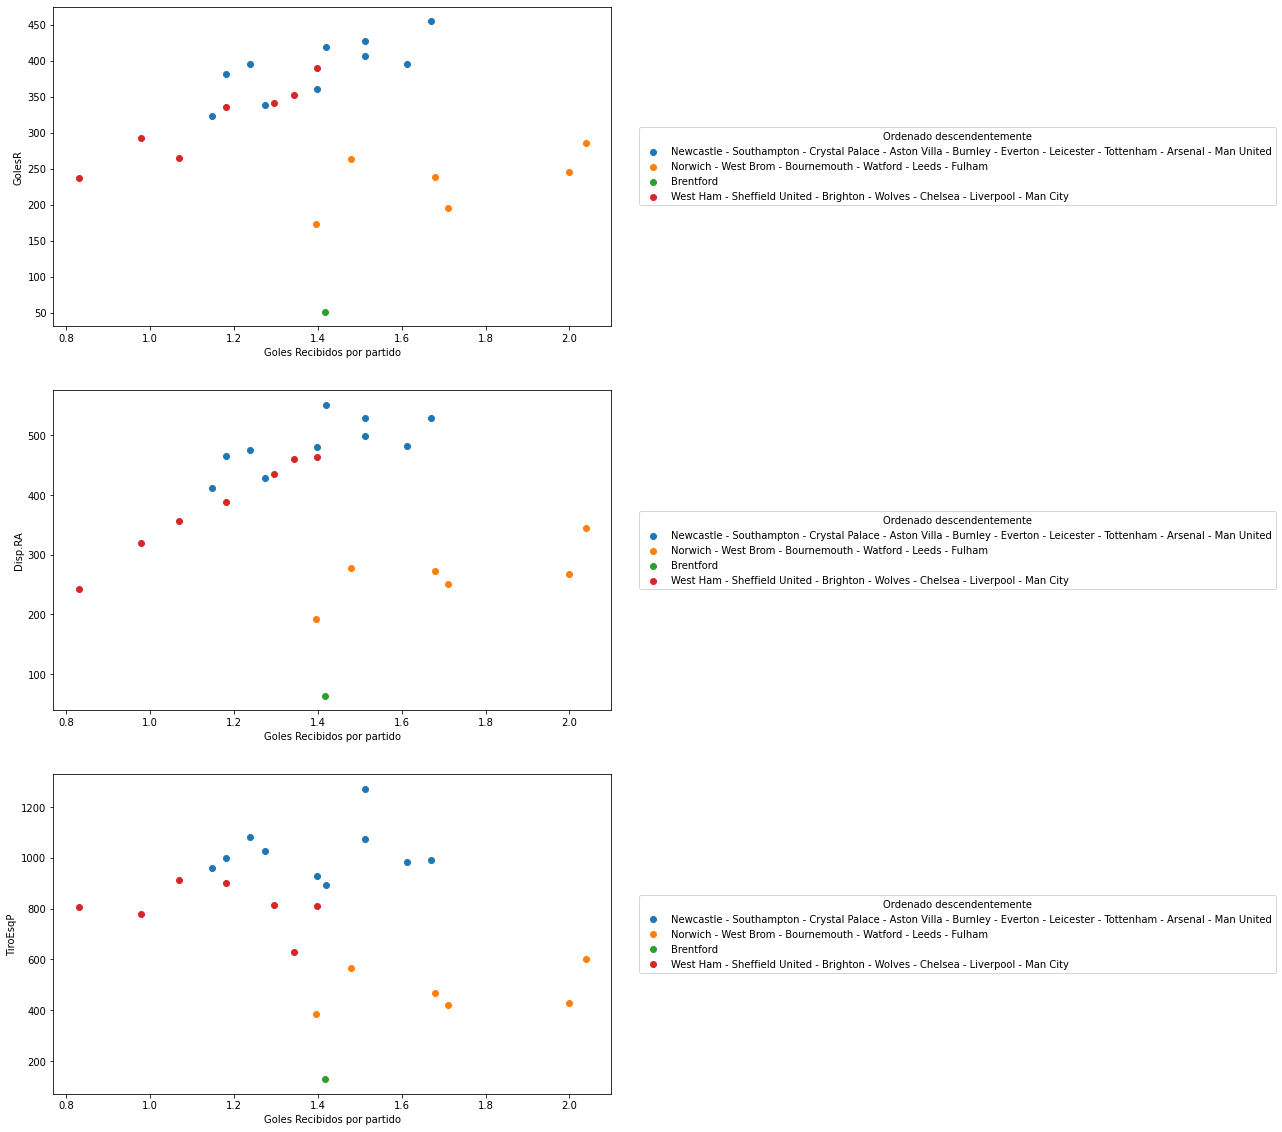

In [126]:
fig,ax=plt.subplots(3,1,figsize=(10,20))
for x in range(3):
    for y in np.unique(X2):
        # etiquetas=
        etiqueta=' - '.join(noqueremos.iloc[X2==y,0].index)
        ax[x].scatter(noqueremosvalores[X2==y,0],noqueremosvalores[X2==y,x+1],label=etiqueta)
    ax[x].legend(title='Ordenado descendentemente',bbox_to_anchor=(1.04,0.5),loc='center left')
    ax[x].set_xlabel('Goles Recibidos por partido')
    ax[x].set_ylabel(F"{noqueremos.columns[x]}")


<font size=5>El análisis por desventaja considera la mejor opción aquella que este mas cercana al 0 en ambos ejes, en las graficas el "Man city" Es el que tiene menores goles recibidos por partido entre todos los equipos, algo muy importante, pero las otras caracteristicas las tiene muy altas pero se mantiene en el promedio, junto a la gran mayoria de datos.<hr> La mejor opcion entre todas es el "Man City" Pues presenta los mejores datos favorables y en los datos desfavorables tiene menos goles recibidos por partido (0.82) atributo muy importante, en los otros desfavorables se encuentra que "Man city" es en la media a pesar de esto la decision esta basada en mayor numero de goles por partidos y menos recibidos por partidos.

Otra opcion muy viable es invertir en liverpool, posee los segundos mejores datos, este se encuntra por debajo de "Man City" con goles hechos por partido 2.1 y 0.97 goles recibidos por partido , en el resto de datos desfavorables se mantiene en la media de la misma manera como el "Man city"</font>

# 3. Ambulance-Hubs/Hospital Locations


In [33]:
client = Socrata("www.datos.gov.co", None)
results = client.get_all("yb9r-2dsi")
df_accidentes=pd.DataFrame(results)
df_accidentes=df_accidentes[df_accidentes['fecha_accidente'].str.count(F"(?:2021)|(?:2020)|(?:2019)")==1]
df_accidentes

,fecha_accidente,a_o_accidente,mes_accidente,dia_accidente,hora_accidente,gravedad_accidente,clase_accidente,sitio_exacto_accidente,cant_heridos_en_sitio_accidente,cantidad_accidentes,cant_muertos_en_sitio_accidente
25044,2019-01-01T00:00:00.000,2019,1,Mar,01:30:00:AM,Solo daños,Choque,CALLE 82 CRA 71,NaN,1,NaN
25045,2019-01-01T00:00:00.000,2019,1,Mar,01:50:00:PM,Con heridos,Choque,CL 30 CR 27,1,1,NaN
25046,2019-01-01T00:00:00.000,2019,1,Mar,03:00:00:PM,Con heridos,Choque,CL 17 CR 30,1,1,NaN
25047,2019-01-01T00:00:00.000,2019,1,Mar,05:45:00:PM,Solo daños,Choque,CRA 31 CALLE 68C,NaN,1,NaN
25048,2019-01-01T00:00:00.000,2019,1,Mar,10:30:00:PM,Con heridos,Atropello,CL 99D CR 8E,3,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
37239,2021-09-30T00:00:00.000,2021,9,Jue,06:20:00:PM,Con heridos,Atropello,CARRERA 15 SUR CON CALLE 73,2,1,NaN
37240,2021-09-30T00:00:00.000,2021,9,Jue,08:10:00:AM,Con heridos,Choque,CARRERA 56 FRENTE # 68 157,1,1,NaN
37241,2021-09-30T00:00:00.000,2021,9,Jue,08:15:00:PM,Con heridos,Choque,CR 20 24 114,1,1,NaN
37242,2021-09-30T00:00:00.000,2021,9,Jue,09:30:00:AM,Solo daños,Choque,CR 25B 74B 94,NaN,1,NaN


In [34]:
direccion=df_accidentes[['sitio_exacto_accidente']]
direccion=direccion.astype(str)
direccion



,sitio_exacto_accidente
25044,CALLE 82 CRA 71
25045,CL 30 CR 27
25046,CL 17 CR 30
25047,CRA 31 CALLE 68C
25048,CL 99D CR 8E
...,...
37239,CARRERA 15 SUR CON CALLE 73
37240,CARRERA 56 FRENTE # 68 157
37241,CR 20 24 114
37242,CR 25B 74B 94


In [35]:



def funcionales(cadena):
    uno=re.sub('[cC]+[aA]?[lL]+[eE]?[a-zA-Z0-9]*','calle',cadena)
    dos= re.sub('(?:[Cc]|[Kk])[Aa]?[Rr]+[eE]?[Rr]?[aA]?[A-Za-z0-9]*','carrera',uno)
    tres=dos.split()
    for x in range(1,len(tres)):
        if 'carrera' in tres[x]:
            tres[x]=''
        elif 'calle' in tres[x]:
            tres[x]=''
    tres=' '.join(tres)
    tres=re.sub('[^calle0-9 carrera]+','',tres)
    return re.sub('  +',' ',tres)

arreglo=[]
for x in direccion.values[:,0]:
    arreglo.append(funcionales(x.upper()))


In [36]:
limpio=pd.Series(arreglo).to_frame('address')
limpio=limpio[limpio['address'].str.count(R"(?:carrera)|(?:calle)")==1]
limpio['acumulado']=[1 for x in range(limpio.shape[0])]
limpio=limpio.groupby('address').sum()
limpio=limpio.iloc[1:,:]
limpio=limpio.drop(index='calle 854 41 41')
limpio=limpio.drop(index='carrera 119 10 17')
limpio=limpio.drop(index='carrera 261 82 08')
limpio=limpio.drop(index='carrera 267 76 32')
limpio=limpio.drop(index='carrera 421 80 40')
limpio=limpio.drop(index='carrera 421 84')
limpio=limpio.drop(index='carrera 424 86')
limpio=limpio.drop(index='carrera 53 106280')
limpio=limpio.drop(index='carrera 82 110 900')
lista=list(limpio.index)

frecuencias=list(limpio.acumulado.values)


In [37]:
latitud=[]
longitud=[]

In [38]:


if(os.path.exists('./GeopyDatoAccidente.csv')):
    todoubicacion=pd.read_csv('./GeopyDatoAccidente.csv')
    todoubicacion   
else:
    geolocator=Nominatim(user_agent="my_request")


    def localizar(direccion):
        geolocator=Nominatim(user_agent="my_request")
        location=geolocator.geocode(F"{direccion} , BARRANQUILLA, ATLANTICO")
        latitud=location.latitude
        longitud=location.longitude
        return latitud,longitud

    for x in lista[4697:]:
        latid,longi=localizar(x)
        latitud.append(latid)
        longitud.append(longi)
    coordenadas=list(zip(lista,latitud,longitud,frecuencias))
    pd.DataFrame(coordenadas,columns=['Direccion','Latitud','Longitud','acumulado']).to_csv('./GeopyDatoAccidente.csv')
    todoubicacion=pd.DataFrame(coordenadas,columns=['Direccion','Latitud','Longitud','acumulado'])
todoubicacion




,Direccion,Latitud,Longitud,acumulado
0,calle 1,11.013823,-74.839281,1
1,calle 1 2 15,11.013823,-74.839281,1
2,calle 1 3 11,11.013823,-74.839281,1
3,calle 1 38,11.013823,-74.839281,1
4,calle 1 44,11.013823,-74.839281,1
...,...,...,...,...
4732,carrera 9 94,10.949174,-74.771679,2
4733,carrera 9 98,10.949174,-74.771679,1
4734,carrera 9 99,10.949174,-74.771679,2
4735,carrera 96 99,11.009275,-74.835885,1


In [39]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

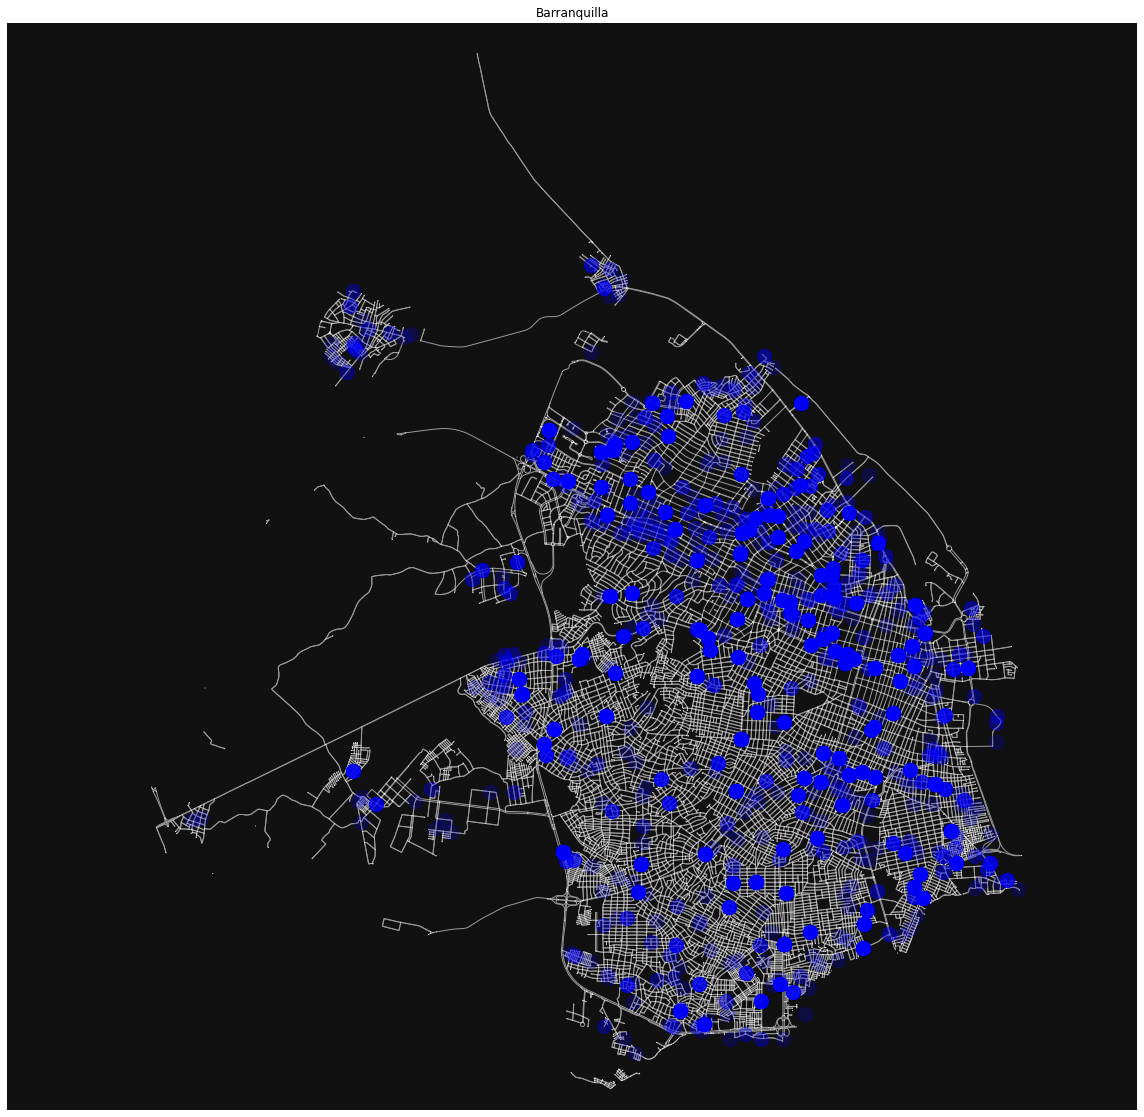

In [42]:
lugar=['Barranquilla, Atlantico']
G=ox.graph_from_place(lugar,retain_all=True,simplify=True,network_type='drive')

Glatitud,Glongitud=10.960583,-74.8028057

norte=Glatitud+0.12
sur=Glatitud - 0.05
este= Glongitud +0.06
oeste= Glongitud - 0.12
fig,ax= ox.plot_graph(G,node_size=1,bbox=(norte,sur,este,oeste),edge_alpha=1,figsize=(30,20),show=False,close=False)
ax.set_title('Barranquilla')
ax.scatter(todoubicacion['Longitud'],todoubicacion['Latitud'],c='b',s=200,alpha=0.2)

<font size=5> Lugares donde ocurrieron los accidentes 